In [1]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import scipy
import PIL
import requests

In [2]:
# load data, removing spaces in column headers
columns = ["Customer_ID", "Age", "Gender", "Item_Purchased", "Item_Category", "Purchase_Amount_(USD)", "Location", "Color", "Season", "Review_Rating", "Subscription_Status", "Shipping_Type", "Discount_Applied", "Promo_Code_Used", "Previous_Purchases", "Payment_Method", "Frequency_of_Purchases"]
df = pd.read_csv("../data/Customers3.csv", header = 0, names = columns)
df

,Customer_ID,Age,Gender,Item_Purchased,Item_Category,Purchase_Amount_(USD),Location,Color,Season,Review_Rating,Subscription_Status,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
# Would love to make this : https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap#:~:text=86,of%20the%20data.

<Axes: xlabel='Metric', ylabel='Location'>

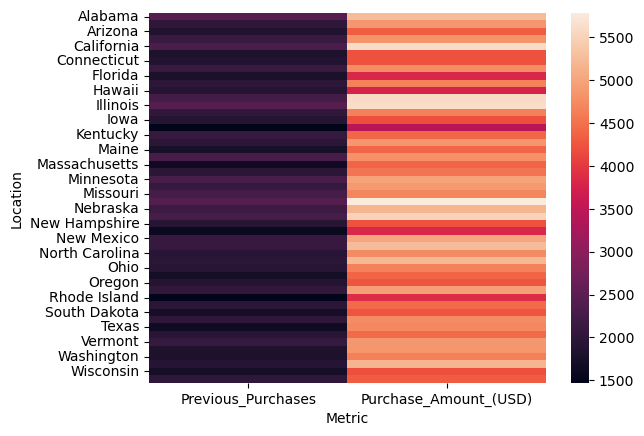

In [ ]:
# grouped = df.groupby("Location").agg({"Purchase_Amount_(USD)" : "sum", "Previous_Purchases" : "sum"}).sum().reset_index()
grouped = df.groupby("Location").agg({"Purchase_Amount_(USD)" : "sum", "Previous_Purchases" : "sum"}).reset_index()
# grouped = grouped.sort_values("Purchase_Amount_(USD)", ascending = False)
# grouped["Dummy"] = ''
melted = grouped.melt(id_vars="Location", var_name="Metric", value_name="Value")
heatmap_data = melted.pivot(index = "Location", columns = "Metric", values = "Value")
# pivot = grouped.pivot(index = "Location", columns = "Dummy", values = "Purchase_Amount_(USD)")
# sns.heatmap(pivot)
sns.heatmap(heatmap_data)

In [12]:
# df_heat = df.pivot(index="Location", columns="Previous_Purchases", values="Purchase_Amount_(USD)")
target_df = df.filter(["Location", "Purchase_Amount_(USD)", "Previous_Purchases"], axis = 1)
# df_heat = df.pivot(index="Location", columns="Previous_Purchases", values="Purchase_Amount_(USD)")
df_heat = df.pivot(index="Location", columns="Previous_Purchases", values="Purchase_Amount_(USD)")
sns.heatmap(df_heat, annot = df_heat.rank(axis="columns"))

ValueError: Index contains duplicate entries, cannot reshape

<Axes: >

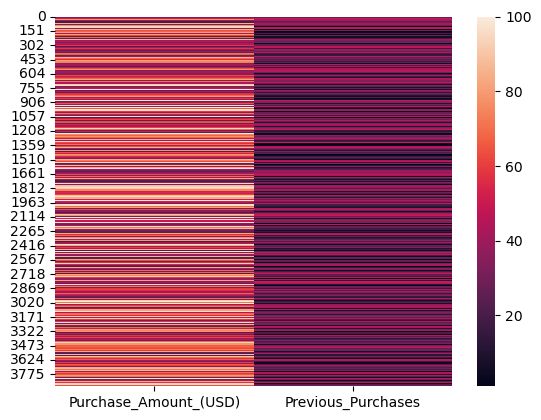

In [21]:
# dataframe of just target values 
# target_df = df.filter(["Location", "Purchase_Amount_(USD)", "Previous_Purchases"], axis = 1)
target_df = df.filter(["Purchase_Amount_(USD)", "Previous_Purchases"], axis = 1)
sns.heatmap(target_df)  # no location info in this


In [5]:
# everything gets a zero-size array warning
# ax = sns.heatmap(x = "Location", y = "Previous_Purchases", data=target_df)
# ax.legend(title='Legend')  # add a title to the legend

In [6]:
# dataframe of just target values 
# target_df = df.filter(["Purchase_Amount_(USD)", "Previous_Purchases"], axis = 0)
# target_map = pd.DataFrame(target_df)
# target_map = target_map.transpose()

In [7]:
# heatmapping location by purchase amount by previous purchases
# sns.heatmap(target_map)